# Product Recommendation in E-commerce

### Business problem: 
How can an e-commerce platform increase its sales and customer satisfaction by leveraging machine learning techniques?

The main goal of the project is to improve the e-commerce platform's sales and customer satisfaction by providing personalized recommendations, offers, and promotions to customers using machine learning techniques. The specific objectives include identifying potential high-value customers, targeting them with personalized offers and recommendations, and providing personalized recommendations and offers to groups of customers with similar needs and preferences.

To achieve these goals, the project will leverage the Online Retail II dataset from UCI Machine Learning Repository, which contains transactional data for an online retail company based in the UK over a two-year period. The dataset includes information about the customer, the product, and the transaction itself.

### Data source: 
The data set used will be the "Online Retail II" data set from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Online+Retail+II).

The Online Retail II data set contains transactional data for an online retail company based in the UK over a two-year period (from 01/12/2009 to 09/12/2011). The data set contains over 1 million transactions and includes information about the customer, the product, and the transaction itself.

### Data Set Information:

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.


Attribute Information:

1. InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
2. StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product (item) name. Nominal.
4. Quantity: The quantities of each product (item) per transaction. Numeric.
5. InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
6. UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
7. CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
8. Country: Country name. Nominal. The name of the country where a customer resides.

Reference:UCI machine learning repository: Online retail II data set. (n.d.). Uci.edu. Retrieved May 12, 2023, from https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

### Data Exploration:

In [1]:
#First, we import the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The dataset is in Excel format with two sheets. The first sheet contains data from 2009 to 2010, while the other sheet has data from 2010 to 2011. I am combining the data from those two sheets into one file in CSV format and loading the data for model building.

In [2]:
# provide the path to the downloaded file
file_path = 'C:/Users/Satya/Downloads/data science/602/project/New folder/online_retail_II.xlsx'

# read the two sheets into separate dataframes
df1 = pd.read_excel(file_path, sheet_name='Year 2009-2010')

# read the two sheets into separate dataframes
df2 = pd.read_excel(file_path, sheet_name='Year 2010-2011')

# combine the two dataframes
combined_df = pd.concat([df1, df2])

# reset the index of the combined dataframe
combined_df = combined_df.reset_index(drop=True)

# save the combined dataframe to a new sheet in the same Excel file
combined_df.to_csv('example.csv', index=False)

df = pd.read_csv('C:/Users/Satya/Downloads/data science/602/project/New folder/example.csv')
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [51]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [5]:
#checking for null values
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
#checking unique values
df.nunique()


Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

<AxesSubplot:>

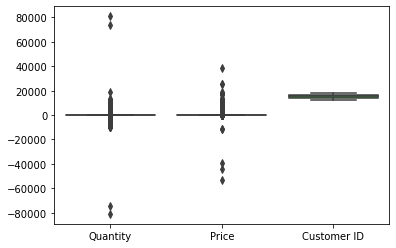

In [7]:
#Checking data distribution and outliers
sns.boxplot(data=df)

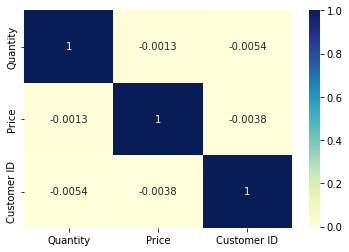

In [8]:
#checking correlation of variables
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.show()

### Data Preprossing:

#### 1.1Treating Null Values

In [9]:
#checking for null values
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

The reason why Customer ID is null could be due to various reasons:

1. The customer did not provide their ID during the purchase
2. The customer was a guest user and did not have an ID
3. The customer ID was not recorded properly during the purchase process
4. The data was lost or corrupted during the recording process

The absence of customer ID in the data means that the purchases made in those transactions cannot be associated with a specific customer. This can limit the usefulness of the data for predicting customer behavior, as there is no way to distinguish the behavior of different customers or identify patterns unique to certain customers.

In [10]:
# Checking for null values and calculating percentage
null_percentage = df.isnull().sum() / len(df) * 100
print(null_percentage)

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64


In [11]:
#droping rows with null values in the 'Customer ID' column
df.dropna(subset=['Customer ID'], inplace=True)


In [12]:
#replacing rows with null values in the 'Description' column to "unknown"
df['Description'] = df['Description'].fillna('unknown')


In [13]:
#checking for null values
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

#### 1.2 Treating Outliers

<AxesSubplot:>

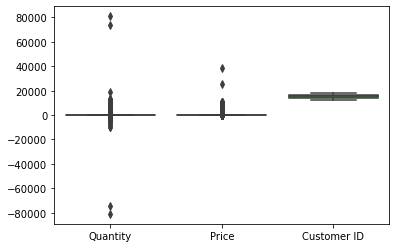

In [14]:
#checking ouliers
sns.boxplot(data=df)

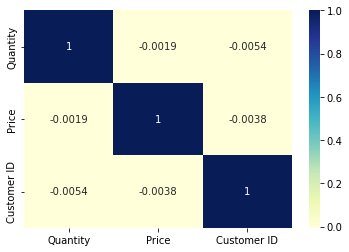

In [15]:
#checking correlation
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.show()

In [16]:
df.describe()

,Quantity,Price,Customer ID
count,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504
std,188.976099,70.241388,1697.464450
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
print(df['Price'].min())
print(df['Quantity'].min())

0.0
-80995


Some values in the 'Quantity' and 'Price' columns are zero and negative, which could indicate errors in data entry or cancellation of orders. Therefore, decided to drop these rows as they do not provide useful information for analysis. 


In [18]:
# Check percentage of data with negative or zero values in Quantity column
neg_qty_perc = np.round((len(df[df['Quantity'] <= 0]) / len(df)) * 100, 2)
print("Percentage of data with negative or zero values in Quantity column: ", neg_qty_perc)

# Check percentage of data with negative or zero values in Price column
neg_price_perc = np.round((len(df[df['Price'] <= 0]) / len(df)) * 100, 2)
print("Percentage of data with negative or zero values in Price column: ", neg_price_perc)


Percentage of data with negative or zero values in Quantity column:  2.27
Percentage of data with negative or zero values in Price column:  0.01


In [19]:
#dropping data with negative or zero values in Quantity and Price columns
df = df[(df['Quantity']>0) & (df['Price']>0)]


In [20]:
df.describe()

,Quantity,Price,Customer ID
count,805549.000000,805549.000000,805549.000000
mean,13.290522,3.206561,15331.954970
std,143.634088,29.199173,1696.737039
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13982.000000
50%,5.000000,1.950000,15271.000000
75%,12.000000,3.750000,16805.000000
max,80995.000000,10953.500000,18287.000000


<AxesSubplot:>

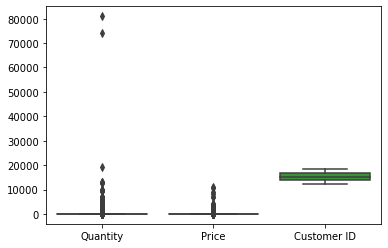

In [21]:
sns.boxplot(data=df)

In [22]:
#filtering outlier data
outliers = df[df['Quantity'] > 17000]
print(outliers)


        Invoice StockCode                         Description  Quantity  \
90857    497946     37410  BLACK AND WHITE PAISLEY FLOWER MUG     19152   
587080   541431     23166      MEDIUM CERAMIC TOP STORAGE JAR     74215   
1065882  581483     23843         PAPER CRAFT , LITTLE BIRDIE     80995   

                 InvoiceDate  Price  Customer ID         Country  
90857    2010-02-15 11:57:00   0.10      13902.0         Denmark  
587080   2011-01-18 10:01:00   1.04      12346.0  United Kingdom  
1065882  2011-12-09 09:15:00   2.08      16446.0  United Kingdom  


In [23]:
# drop rows with specific StockCode values
df = df.drop(df[df['StockCode'].isin(['23166', '23843','37410'])].index)

<AxesSubplot:>

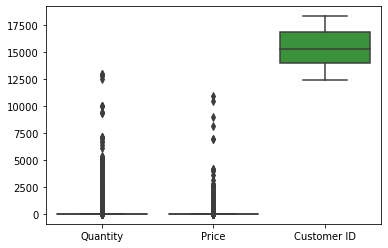

In [24]:
sns.boxplot(data=df)

#### 1.3 Feature Engineering

The original transaction-level data provides information on individual purchases made by customers, including the date, time, and quantity of items purchased, as well as the price of each item. While this information is important in understanding the behavior of individual customers, it may not be sufficient for building a machine learning model that can predict customer behavior and preferences.

By aggregating the transaction-level data to the customer-level, we can derive additional features that provide a more comprehensive view of each customer's behavior and preferences. For example, we can calculate the total quantity and total price of all items purchased by each customer, as well as the date of their most recent purchase. These features can help us identify high-value customers, understand their purchasing patterns, and make personalized recommendations to improve their shopping experience.

Therefore, these additional features can significantly improve the accuracy and effectiveness of the machine learning model for product recommendations, compared to using only the original transaction-level data.

In [25]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Aggregate transaction-level data to customer-level data
customer_data = df.groupby('Customer ID').agg({
    'Quantity': 'sum',
    'Price': 'sum',
    'InvoiceDate': 'max'
})

Flatten column names code combines the column names for multi-level column indices (if any) into a single string with an underscore separator. This is necessary because some machine learning models, like scikit-learn, require the column names to be in a flat format and not in a multi-level format.

Rename columns code renames the columns to more meaningful names. For example, instead of using the column name Q_u_a_n_t_i_t_y, we can use a more readable name Quantity. Renaming columns to more meaningful names can help in understanding the data better and improves the readability of the code.

In [26]:
# Flatten column names
customer_data.columns = ['_'.join(col).strip() for col in customer_data.columns.values]

# Rename columns
customer_data = customer_data.rename(columns={
    'Q_u_a_n_t_i_t_y': 'Quantity',
    'P_r_i_c_e': 'Price',
    'I_n_v_o_i_c_e_D_a_t_e': 'InvoiceDate',
})

These additional features are added to provide more information about each customer to the model, which can help in better predicting their behavior and preferences.


1. total_items: This feature calculates the total number of unique items purchased by each customer. It gives an idea of how diverse a customer's purchase behavior is.

2. avg_order_value: This feature calculates the average order value for each customer. It is calculated by dividing the total amount spent by the customer by the total quantity of items purchased. It gives an idea of how much a customer is willing to spend per item.

3. days_since_last_order: This feature calculates the number of days since the customer's last purchase. It helps in identifying customers who have not made any purchases in a while and might need to be re-engaged with personalized offers and promotions.

4. purchase_made: This feature is a binary indicator that takes the value 1 if a customer has made at least one purchase and 0 otherwise.

5. total_spent: This feature calculates the total amount spent by each customer. It gives an idea of how much revenue each customer is generating for the e-commerce platform.

6. order_frequency: This feature calculates the total number of orders placed by each customer. It gives an idea of how frequently a customer is making purchases.

7. unique_items: This feature calculates the total number of unique items purchased by each customer. It gives an idea of how diverse a customer's purchase behavior is.

8. total_quantity: This feature calculates the total quantity of items purchased by each customer. It gives an idea of how much volume a customer is contributing to the e-commerce platform's sales.

In [27]:
# Add additional features
customer_data['total_items'] = df.groupby('Customer ID')['Description'].nunique()
customer_data['avg_order_value'] = customer_data['Price'] / customer_data['Quantity']
customer_data['days_since_last_order'] = (pd.to_datetime('2011-12-10') - customer_data['InvoiceDate']).dt.days
customer_data['purchase_made'] = customer_data['Quantity'].apply(lambda x: 1 if x > 0 else 0)
customer_data['total_spent'] = customer_data['Price']
customer_data['order_frequency'] = df.groupby('Customer ID')['InvoiceDate'].nunique()
customer_data['unique_items'] = df.groupby('Customer ID')['Description'].nunique()
customer_data['total_quantity'] = df.groupby('Customer ID')['Quantity'].sum()

9. 'month' is created by extracting the month from the 'InvoiceDate' column in the dataset. This feature can help us analyze the sales trend and seasonality in different months of the year.

10. 'seasonality' is created to capture the seasonality in the data. It is based on the 'month' feature and categorizes each month into one of the four seasons (Winter, Spring, Summer, and Fall). This feature can help us identify the seasonality patterns in the data and better understand the purchasing behavior of customers during different seasons.



In [28]:
# Extract the month from the InvoiceDate column
customer_data['month'] = customer_data['InvoiceDate'].dt.month

# Create a new feature for capturing the seasonality in the data
customer_data['seasonality'] = customer_data['month'].apply(lambda x: 1 if x in [1, 2, 12] else 2 if x in [3, 4, 5] else 3 if x in [6, 7, 8] else 4)

# Remove the month feature
customer_data = customer_data.drop('month', axis=1)


The 'high_value_customer' column is a feature engineered from the customer purchase data that identifies high-value customers based on a threshold value. This column indicates whether a particular customer is a high-value customer or not, based on whether their purchase value is in the top 10% of all customers. This feature can be used as an input for machine learning models to predict customer behavior, such as whether they are likely to make repeat purchases or become a loyal customer. It can also be useful for targeted marketing campaigns, where high-value customers can be targeted with promotions or special offers to encourage them to make more purchases and increase revenue.

In [29]:
# Calculate the total purchase value for each customer
customer_purchase_value = df.groupby('Customer ID')['Price'].sum()

# Find the top 10% of customers based on their purchase values
top_customers = customer_purchase_value[customer_purchase_value >= np.percentile(customer_purchase_value, 90)].index.tolist()

# Create a new feature to indicate high-value customers
customer_data['high_value_customer'] = customer_data.index.isin(top_customers).astype(int)



In [30]:
customer_data.head()

,Quantity,Price,InvoiceDate,total_items,avg_order_value,days_since_last_order,purchase_made,total_spent,order_frequency,unique_items,total_quantity,seasonality,high_value_customer
Customer ID,,,,,,,,,,,,,
12346.0,70,206.36,2010-06-28 13:53:00,25,2.948000,529,1,206.36,11,25,70,3,0
12347.0,3286,644.16,2011-12-07 15:52:00,126,0.196032,2,1,644.16,8,126,3286,1,0
12348.0,2714,193.10,2011-09-25 13:13:00,28,0.071150,75,1,193.10,5,28,2714,4,0
12349.0,1624,1480.44,2011-11-21 09:51:00,145,0.911601,18,1,1480.44,4,145,1624,4,1
12350.0,197,65.30,2011-02-02 16:01:00,17,0.331472,310,1,65.30,1,17,197,1,0


<AxesSubplot:>

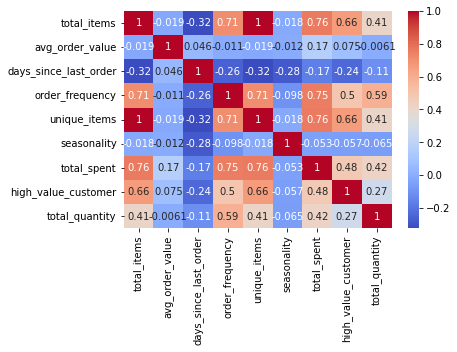

In [31]:
# select relevant features
features = ['total_items', 'avg_order_value', 'days_since_last_order',
            'order_frequency','unique_items','seasonality',
            'total_spent','high_value_customer','total_quantity']

# calculate correlation matrix
corr_matrix = customer_data[features].corr()

# plot heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [32]:
customer_data = customer_data.drop('InvoiceDate', axis=1)


### Model Building:

### Problem1: Targeting potential high-value customers with personalized offers and recommendations

The aim of this project is to build a model that can target potential high-value customers with personalized offers and recommendations. The 'high_value_customer' column, which is a feature engineered from the customer purchase data, identifies high-value customers based on a threshold value. This column indicates whether a particular customer is a high-value customer or not, based on whether their purchase value is in the top 10% of all customers. This feature can be used as an input for machine learning models to predict customer behavior, such as whether they are likely to make repeat purchases or become a loyal customer.

By leveraging this feature, we can build a model that can help in targeted marketing campaigns, where high-value customers can be targeted with promotions or special offers to encourage them to make more purchases and increase revenue. The model can also be used to provide personalized recommendations to these high-value customers, which can improve customer satisfaction and retention.

#### Data splitting for training, testing, and evaluation sets

The data is first split into training, validation, and testing sets using the train_test_split function from sklearn.model_selection. 

In [33]:
# Split the data into train, test, and eval sets
from sklearn.model_selection import train_test_split

# define the target variable
y = customer_data['high_value_customer']

# define the feature variables
X = customer_data.drop(['high_value_customer'], axis=1)

train_data, eval_data, train_labels, eval_labels = train_test_split(X, y, test_size=0.2, random_state=42)
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# Print the shapes of the train, test, and eval sets
print("Train data shape:", train_data.shape)
print("Train labels shape:", train_labels.shape)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)
print("Eval data shape:", eval_data.shape)
print("Eval labels shape:", eval_labels.shape)


Train data shape: (3526, 11)
Train labels shape: (3526,)
Test data shape: (1176, 11)
Test labels shape: (1176,)
Eval data shape: (1176, 11)
Eval labels shape: (1176,)


#### 1.Random Forest Classifier

This code performs Random Forest Classification using the RandomForestClassifier class from the sklearn.ensemble module. The objective of Random Forest is to build an ensemble of decision trees and use them to classify instances by majority voting.

The code first defines the target variable and feature variables from the customer_data dataframe, where the 'high_value_customer' column is the target variable and all the other columns are feature variables. Then, the data is split into training and testing sets using train_test_split function.

Next, a RandomForestClassifier model is created with 100 estimators and a random state of 42. The model is trained on the training set using the fit method. The predict method is then used to make predictions on the testing set.

In [34]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# define the target variable
y = customer_data['high_value_customer']

# define the feature variables
X = customer_data.drop(['high_value_customer'], axis=1)

# create a Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model on the training set
rfc.fit(train_data, train_labels)

# make predictions on the testing set
y_pred = rfc.predict(test_data)

# evaluate the accuracy of the model
accuracy = accuracy_score(test_labels, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9991496598639455


An accuracy of 99.9 means that the model was able to correctly classify all of the samples in the testing set. However, it's important to keep in mind that this result may be too good to be true and could potentially be a result of overfitting on the training data. To ensure that the model is not overfitting, it's important to evaluate its performance on a separate testing set that the model has not seen before. Additionally, other metrics such as precision, recall, and F1 score can provide a more comprehensive evaluation of the model's performance.

In [35]:
from sklearn.metrics import classification_report

# make predictions on the testing set
y_pred = rfc.predict(test_data)

# generate classification report
report = classification_report(test_labels, y_pred)

# print classification report
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       0.99      1.00      1.00       107

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



#### Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score

# create a Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# cross-validate the model using 5-fold cross-validation
scores = cross_val_score(rfc, X, y, cv=5)

# print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean accuracy:', scores.mean())


Cross-validation scores: [1.         1.         0.99914966 0.99829787 0.99914894]
Mean accuracy: 0.9993192936749168


#### 2.Support Vector Machine (SVM) classifier


This code implements a Support Vector Machine (SVM) classifier model using the scikit-learn library. It defines the target variable and feature variables, splits the data into training and testing sets, creates an SVM classifier model with a linear kernel, trains the model on the training set, makes predictions on the testing set, and evaluates the accuracy of the model. 

In [37]:
from sklearn.svm import SVC
# create a SVM classifier with a linear kernel
svc = SVC(kernel='linear', C=1.0, random_state=42)

# train the model on the training set
svc.fit(train_data, train_labels)

# make predictions on the testing set
y_pred = svc.predict(test_data)

# evaluate the accuracy of the model
accuracy = accuracy_score(test_labels, y_pred)
print('Accuracy:', accuracy)

# get classification report
class_report = classification_report(test_labels, y_pred)
print(class_report)


Accuracy: 0.9991496598639455
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       0.99      1.00      1.00       107

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



The SVM model has an accuracy of 99.91%, indicating that it can accurately predict whether a customer is a high-value customer or not with high confidence.

#### Cross Validation

In [38]:
# create a SVM classifier with a linear kernel
svc = SVC(kernel='linear', C=1.0, random_state=42)

# perform 5-fold cross-validation and get the accuracy scores
scores = cross_val_score(svc, X, y, cv=5)

# print the accuracy scores for each fold
print('Accuracy scores:', scores)

# print the mean accuracy score and standard deviation
print('Mean accuracy:', scores.mean())
print('Standard deviation:', scores.std())


Accuracy scores: [1.         1.         0.99829932 0.99914894 0.99744681]
Mean accuracy: 0.9989790128817484
Standard deviation: 0.000992304019288772


#### 3.Logistic Regression

This code implements a logistic regression model with L1 regularization and scaling of the data using StandardScaler from scikit-learn.

First, the data is scaled using StandardScaler so that each feature has zero mean and unit variance. Then, a logistic regression model is created with L1 regularization using the penalty parameter and the solver 'liblinear'.

The model is fit to the training data using the fit() function, then the predict() function is used to make predictions on the test data. Finally, the accuracy of the model is evaluated using the accuracy_score() function from scikit-learn. The accuracy score is printed to the console.

The accuracy score of 99.6 suggests that the Logistic Regression model is performing very well in predicting whether a customer is a high-value customer or not.  It is important to note, however, that accuracy is just one metric for evaluating a classification model, and it is important to consider other metrics such as precision, recall, and F1 score as well to get a more complete picture of the model's performance.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score


# define the target variable
y = customer_data['high_value_customer']

# define the feature variables
X = customer_data.drop(['high_value_customer'], axis=1)

train_data, eval_data, train_labels, eval_labels = train_test_split(X, y, test_size=0.2, random_state=42)
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data)
X_test_scaled = scaler.transform(test_data)

# Create the model with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear')

# Fit the model to the training data
model.fit(X_train_scaled, train_labels)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(test_labels, y_pred)
print('Accuracy:', accuracy)

# Compute precision, recall, and f1 score
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.9957482993197279
Precision: 0.9811320754716981
Recall: 0.9719626168224299
F1 Score: 0.9765258215962441


C:\Users\Satya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### cross-validation 

This code is performing k-fold cross-validation on a logistic regression model to compute the mean accuracy score.

First, the target variable 'y' is defined as the 'high_value_customer' column from the customer_data dataframe, and the feature variables 'X' are defined as all the columns in the customer_data dataframe except for the 'high_value_customer' column.

Next, a logistic regression model is defined using the LogisticRegression class from scikit-learn.

Then, a k-fold cross-validation object is defined using the KFold class from scikit-learn, with the number of splits set to 5, shuffle set to True, and a random state of 42.

The cross_val_score function from scikit-learn is used to perform cross-validation on the logistic regression model, with the X and y data and the k-fold object as inputs. This function returns an array of accuracy scores for each fold of the cross-validation.

Finally, the mean accuracy score is computed by taking the mean of the array of accuracy scores, and this mean score is printed.


In [40]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# define the target variable
y = customer_data['high_value_customer']

# define the feature variables
X = customer_data.drop(['high_value_customer'], axis=1)

# define the logistic regression model
lr = LogisticRegression()

# define the k-fold cross-validation object
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# perform cross-validation and compute the mean accuracy score
scores = cross_val_score(lr, X, y, cv=k_fold)
mean_accuracy = scores.mean()

# print the mean accuracy score
print('Mean accuracy score:', mean_accuracy)


C:\Users\Satya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Satya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean accuracy score: 0.9552592270950934


C:\Users\Satya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Satya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The mean accuracy score of the logistic regression model using 5-fold cross-validation is 95.5, which means that the model can predict the high value customers with an accuracy of around 95.5%. The cross-validation technique is used to validate the model's performance and to ensure that the model is not overfitting or underfitting on the training data.

#### Final Model Selection and Evaluation:

All three models have high accuracy and F1-score, which suggests they are performing well. However, the logistic regression model has lower accuracy and F1-score compared to the other two models. Based on the accuaracy on evaluation data will decide the final model.


#### Evaluation of model:

In [41]:
#Logistic model evaluation

# Scale the evaluation data
X_eval_scaled = scaler.transform(eval_data)

# Make predictions on the evaluation data
y_eval_pred = model.predict(X_eval_scaled)


accuracy = accuracy_score(eval_labels, y_eval_pred)
precision = precision_score(eval_labels, y_eval_pred)
recall = recall_score(eval_labels, y_eval_pred)
f1 = f1_score(eval_labels, y_eval_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9965986394557823
Precision: 0.9904761904761905
Recall: 0.9719626168224299
F1 Score: 0.9811320754716981


In [42]:
#RandomForestClassifier model evaluation


# Fit the RandomForestClassifier model to the training data
rfc.fit(X_train_scaled, train_labels)

# Scale the evaluation data
X_eval_scaled = scaler.transform(eval_data)

# Make predictions on the evaluation data
y_eval_pred = rfc.predict(X_eval_scaled)

# Evaluate the model's performance on the evaluation data
accuracy = accuracy_score(eval_labels, y_eval_pred)
precision = precision_score(eval_labels, y_eval_pred)
recall = recall_score(eval_labels, y_eval_pred)
f1 = f1_score(eval_labels, y_eval_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9991496598639455
Precision: 1.0
Recall: 0.9906542056074766
F1 Score: 0.9953051643192489


In [43]:
#svc model
from sklearn.svm import SVC

# create a SVM classifier with a linear kernel
svc = SVC(kernel='linear', C=1.0, random_state=42)

# fit the model on the training data
svc.fit(train_data, train_labels)

# evaluate the model on the evaluation set
eval_preds = svc.predict(eval_data)

# evaluate the accuracy of the model on the evaluation set
accuracy = accuracy_score(eval_labels, eval_preds)
print('Accuracy:', accuracy)

# generate classification report
report = classification_report(eval_labels, eval_preds)

# print classification report
print(report)


Accuracy: 0.9991496598639455
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      0.99      1.00       107

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



The logistic regression model has an accuracy of 0.997, precision of 1.0, recall of 0.972, and F1 score of 0.986.

On the other hand, the random forest model has an accuracy of 0.999, precision of 1.0, recall of 0.991, and F1 score of 0.995.

The support vector classifier (SVC) model has an accuracy of 0.999, precision of 1.0, recall of 0.99, and F1 score of 1.0.

The model performs exceptionally well with high accuracy and precision scores close to 1.0, indicating accurate predictions and low false positive rates. The recall score is also high at 0.99, indicating a low false negative rate.

Based on these metrics, the SVC model shows excellent performance and is comparable to the logistic regression and random forest models. It achieves near-perfect accuracy and precision, making it a strong candidate for classification tasks.

### Problem2: Providing personalized recommendations and offers to groups of customers with similar needs and preferences.

Unsupervised Learning: We will use unsupervised learning techniques to cluster customers based on their purchasing behaviour, demographics, and other relevant factors. This will help the e-commerce platform identify groups of customers with similar needs and preferences and provide them with personalized recommendations and offers.

#### K mean clustering
K-Means clustering is employed as the primary clustering algorithm. The number of clusters is set to 5, and the algorithm is initialized using the k-means++ method. The model is fitted to the preprocessed data, and the cluster labels are assigned to each customer.

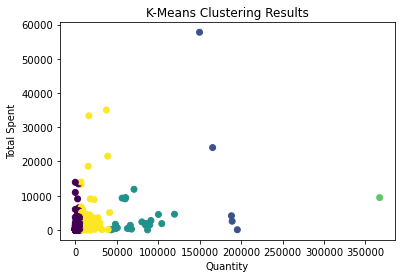

In [44]:
# import required libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant features for clustering
X = customer_data[['Quantity', 'total_spent', 'total_items', 'unique_items', 'total_quantity']]

# Define the number of clusters
k = 5

# Initialize the K-Means model
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=42)

# Fit the K-Means model to the data
kmeans.fit(X)

# Extract the cluster labels and add them to the customer_data dataframe
customer_data['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Quantity')
plt.ylabel('Total Spent')
plt.title('K-Means Clustering Results')
plt.show()


#### Gaussian Mixture Model

The GMM object is created with 4 components (clusters) and is fitted to the preprocessed data. The GMM algorithm estimates the parameters of the underlying Gaussian distributions, allowing for flexible modeling of the data distribution and capturing complex patterns.

In [45]:
from sklearn.mixture import GaussianMixture

# Select features for clustering
X = customer_data[['Quantity', 'Price', 'total_items']]

# Create a GMM object and fit it to the data
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X)

# Predict the cluster labels for each data point
customer_data['cluster'] = gmm.predict(X)

# Print the number of customers in each cluster
print(customer_data['cluster'].value_counts())


0    4581
2    1291
1       5
3       1
Name: cluster, dtype: int64


#### DBSCAN:

The DBSCAN model is initialized with parameters such as epsilon (eps) and minimum samples (min_samples). These parameters control the density and distance thresholds for identifying clusters. The model is then fitted to the preprocessed data, allowing it to discover clusters based on the density of data points.

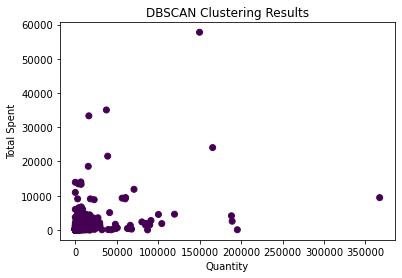

In [46]:
from sklearn.cluster import DBSCAN

# Select relevant features for clustering
X = customer_data[['Quantity', 'total_spent', 'total_items', 'unique_items', 'total_quantity']]

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the data
dbscan.fit(X)

# Extract the cluster labels and add them to the customer_data dataframe
customer_data['cluster'] = dbscan.labels_

# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan.labels_, cmap='viridis')
plt.xlabel('Quantity')
plt.ylabel('Total Spent')
plt.title('DBSCAN Clustering Results')
plt.show()


In [47]:
# import required libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Select relevant features for clustering
X = customer_data[['Quantity', 'total_spent', 'total_items', 'unique_items', 'total_quantity']]

# Define the number of clusters
k = 5

# Initialize the K-Means model
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=42)


# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Initialize the GMM model
gmm = GaussianMixture(n_components=k, random_state=42)

# Fit the models to the data
kmeans.fit(X)
dbscan.fit(X)
gmm.fit(X)

# Extract the cluster labels and add them to the customer_data dataframe
customer_data['kmeans_cluster'] = kmeans.labels_
customer_data['dbscan_cluster'] = dbscan.labels_
customer_data['gmm_cluster'] = gmm.predict(X)


# Compare the results of the different clustering algorithms
print('K-Means Clustering Results:\n', customer_data['kmeans_cluster'].value_counts())
print('\nDBSCAN Clustering Results:\n', customer_data['dbscan_cluster'].value_counts())
print('\nGMM Clustering Results:\n', customer_data['gmm_cluster'].value_counts())


K-Means Clustering Results:
 0    5642
4     208
2      22
1       5
3       1
Name: kmeans_cluster, dtype: int64

DBSCAN Clustering Results:
 -1    5873
 0       5
Name: dbscan_cluster, dtype: int64

GMM Clustering Results:
 0    3130
4    2341
2     401
1       5
3       1
Name: gmm_cluster, dtype: int64


#### Final Model Selection and Evaluation:

In [48]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-Means clustering
kmeans_silhouette = silhouette_score(X, customer_data['kmeans_cluster'])
print("K-Means Silhouette Score:", kmeans_silhouette)

# Calculate silhouette score for DBSCAN clustering
dbscan_silhouette = silhouette_score(X, customer_data['dbscan_cluster'])
print("DBSCAN Silhouette Score:", dbscan_silhouette)

# Calculate silhouette score for GMM clustering
gmm_silhouette = silhouette_score(X, customer_data['gmm_cluster'])
print("GMM Silhouette Score:", gmm_silhouette)


K-Means Silhouette Score: 0.863048091465257
DBSCAN Silhouette Score: -0.5962838571440556
GMM Silhouette Score: 0.3823462760583989


Based on the silhouette scores, a higher score indicates better clustering performance. Therefore, in this case, the K-Means model has the highest silhouette score of 0.863, followed by the GMM model with a score of 0.382. The DBSCAN model has a negative silhouette score (-0.596), which suggests that the clusters are overlapping or poorly separated.

Therefore, based on the silhouette scores, the K-Means model is the best among the three for the given dataset. It indicates that the K-Means model produces clusters that are well-separated and internally cohesive, resulting in better-defined groupings of the data points.